# Описание
В данной работе используется датасет из коллекции подержанных автомобилей, выставленных на продажу в Соединенных Штатах.

Необходимо предсказать ценовую категорию автомобиля `price_category`.

Был проведен полный цикл подготовки данных к этапу моделирования (Data Cleaning, Data Visualization, Feature Engineering). 

На этапе моделирования были исползованы следующие алгоритмы:
- Дерево решений
- Случайный лес
- Логистическая регрессия
- Многослойный персептрон

Исходный датасет доступен по ссылке: https://drive.google.com/file/d/16d1vmLb38NpF5cX1x6jDrNDYFwnvchOZ/view?usp=sharing

In [1281]:
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 

In [1063]:
df = pd.read_csv('data/vehicles_dataset.csv', sep=",")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,NaN,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,NaN,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,NaN,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,NaN,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


## Data Preparation

Размер датасета

In [1064]:
df.shape

(10050, 27)

Список колонок датасета

In [1065]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date', 'price_category'],
      dtype='object')

Описательные характеристики всего датасета

In [1066]:
df.describe(include='all')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
count,1.005000e+04,10050,10050,10050,1.005000e+04,10014.000000,9665,9921,6268,5953,...,7845,7087,10048,10048,0.0,10050,9951.000000,9951.000000,10048,10050
unique,NaN,10000,393,405,NaN,NaN,39,3466,6,8,...,13,12,9081,9845,NaN,51,NaN,NaN,9957,3
top,NaN,https://roswell.craigslist.org/cto/d/artesia-1...,"kansas city, MO",https://kansascity.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,NaN,ca,NaN,NaN,2021-04-13T09:11:02-0500,high
freq,NaN,2,86,86,NaN,NaN,1647,151,3134,2288,...,1981,1916,191,7,NaN,1113,NaN,NaN,3,3514
mean,7.311544e+09,NaN,NaN,NaN,2.068429e+04,2010.917815,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,38.590164,-94.161564,NaN,NaN
std,4.475414e+06,NaN,NaN,NaN,1.243216e+05,9.697849,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.844756,18.123096,NaN,NaN
min,7.208550e+09,NaN,NaN,NaN,5.000000e+02,1915.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-67.144243,-158.069300,NaN,NaN
25%,7.308193e+09,NaN,NaN,NaN,7.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.830000,-110.447150,NaN,NaN
50%,7.312756e+09,NaN,NaN,NaN,1.574950e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39.285100,-87.999100,NaN,NaN
75%,7.315275e+09,NaN,NaN,NaN,2.799000e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.427590,-80.830000,NaN,NaN


Вывод значений, которые принимают переменные с характеристиками

In [1067]:
columns_name = df.columns
for name in columns_name:
    print(f"Характеристика: {name}")
    print(f"Количество уникальных значений: {df[name].nunique()}")
    print(f"Список значений:\n{df[name].value_counts()}")
    print("\n")

Характеристика: id
Количество уникальных значений: 10000
Список значений:
7316028281    2
7310693445    2
7310816094    2
7307639785    2
7312525382    2
             ..
7308265563    1
7309504220    1
7316238007    1
7311587823    1
7311960763    1
Name: id, Length: 10000, dtype: int64


Характеристика: url
Количество уникальных значений: 10000
Список значений:
https://roswell.craigslist.org/cto/d/artesia-1999-ford-f250-super-duty-super/7316028281.html         2
https://pueblo.craigslist.org/ctd/d/tempe-2017-ford-450-f450-450-drw-lariat/7310693445.html          2
https://monroe.craigslist.org/ctd/d/monroe-2019-infiniti-qx60-luxe/7310816094.html                   2
https://flint.craigslist.org/ctd/d/davison-2010-ford-150-xlt-supercrew/7307639785.html               2
https://charlotte.craigslist.org/cto/d/myrtle-beach-1947-mercury-hotrod-street/7312525382.html       2
                                                                                                    ..
https://mendocino

#### Целевая переменная находится в колонке _price_category_

Вывод для каждого значения целевой переменной его долю вхождения в выборку.

In [1068]:
# Ваш код здесь
category_list = df.price_category.unique()
value_amount = sum(df.price_category.value_counts())

for category in category_list:
    print(f"{category}: {df.price_category.value_counts()[category]/value_amount}")

high: 0.3496517412935323
medium: 0.32776119402985077
low: 0.3225870646766169


Значения целевой переменной распределены равномерно

## Data Cleaning

In [1069]:
df_c = df.copy()

Необходимо проверить, есть ли в датасете дубликаты

In [1070]:
df_c[df_c.duplicated()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.032300,-104.716000,2021-04-25T20:15:43-0600,low
2159,7312437164,https://yakima.craigslist.org/ctd/d/parker-201...,yakima,https://yakima.craigslist.org,19995,2015.0,subaru,xv crosstrek,NaN,4 cylinders,...,SUV,white,https://images.craigslist.org/01414_cBd43F8IeC...,2015 Subaru XV Crosstrek 2.0i Limited AWD 4dr ...,NaN,wa,46.553190,-120.475680,2021-04-25T11:30:27-0700,medium
2398,7316719393,https://miami.craigslist.org/mdc/ctd/d/miami-2...,south florida,https://miami.craigslist.org,25590,2018.0,volkswagen,golf gti s hatchback,good,NaN,...,sedan,blue,https://images.craigslist.org/00y0y_7qosBCrp0z...,Carvana is the safer way to buy a car During t...,NaN,fl,25.770000,-80.200000,2021-05-04T11:01:11-0400,high
3067,7307971804,https://redding.craigslist.org/ctd/d/sacrament...,redding,https://redding.craigslist.org,8800,2008.0,honda,accord,excellent,NaN,...,sedan,silver,https://images.craigslist.org/00S0S_kT52djO80H...,2008 *** Honda Accord EX L w/Navi 4dr Sedan 5A...,NaN,ca,38.608824,-121.400837,2021-04-16T15:01:16-0700,low
3236,7307083381,https://westernmass.craigslist.org/ctd/d/sprin...,western massachusetts,https://westernmass.craigslist.org,21990,2017.0,gmc,acadia sle-1 sport utility,good,NaN,...,SUV,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,ma,42.110000,-72.530000,2021-04-15T06:10:54-0400,medium


Проверка одной из строк

In [1071]:
df_c[df_c.id == 7312641615]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,price_category
616,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.0323,-104.716,2021-04-25T20:15:43-0600,low
1326,7312641615,https://pueblo.craigslist.org/cto/d/pueblo-196...,pueblo,https://pueblo.craigslist.org,6500,1969.0,chevrolet,c10,good,8 cylinders,...,NaN,red,https://images.craigslist.org/00f0f_kmR1TNWM4O...,"1969 C10 runs and drives clean body, needs inn...",NaN,co,38.0323,-104.716,2021-04-25T20:15:43-0600,low


Удаление лишних строк

In [1072]:
df_c = df_c.drop_duplicates()
df_c.shape

(10000, 27)

Вывод количества полностью заполненных объектов и их процент из всей выборки

In [1073]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов и всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))
    
print_useful_rows_info(df_c)

Количество полностью заполненных объектов из всей выборки:  0
Процент полностью заполненных объектов и всей выборки:  0.0


Вывод процента пропущенных значений для каждого признака

In [1074]:
def missing_values(df):
    missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending=False)
    print('Процент пропущенных значений:\n', missing_values)
missing_values(df_c)

Процент пропущенных значений:
 county            100.00
size               71.91
cylinders          40.80
VIN                39.38
condition          37.66
drive              30.06
paint_color        29.50
type               21.94
manufacturer        3.82
title_status        1.66
model               1.28
long                0.98
lat                 0.98
fuel                0.63
transmission        0.45
odometer            0.43
year                0.36
posting_date        0.02
image_url           0.02
description         0.02
state               0.00
id                  0.00
url                 0.00
price               0.00
region_url          0.00
region              0.00
price_category      0.00
dtype: float64


Вывод матрицы пропусков

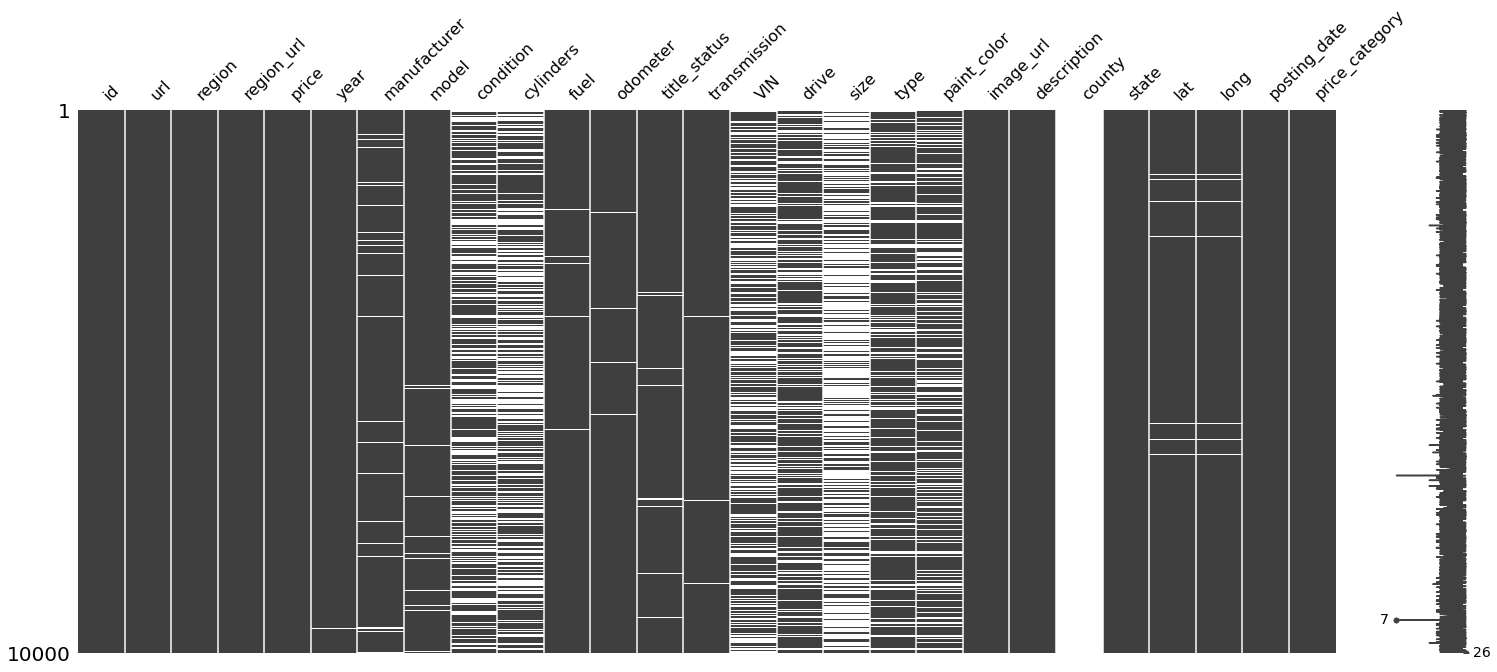

In [1075]:
msno.matrix(df_c);

### Обработка пропусков в `county`

In [1076]:
df_c.county.value_counts(dropna=False)

NaN    10000
Name: county, dtype: int64

In [1077]:
df_c = df_c.drop(columns=['county'])
df_c.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,good,NaN,...,NaN,pickup,silver,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,good,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,NaN,NaN,...,NaN,wagon,white,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,new,4 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium


### Обработка пропусков в `manufacturer`

In [1078]:
df_c.manufacturer.value_counts(dropna=False)

ford               1638
chevrolet          1293
toyota              779
jeep                490
honda               466
nissan              454
ram                 411
NaN                 382
gmc                 358
bmw                 330
dodge               325
volkswagen          251
mercedes-benz       239
hyundai             225
subaru              210
kia                 200
audi                200
lexus               184
cadillac            183
chrysler            161
acura               150
buick               145
mazda               142
infiniti            117
lincoln             113
mitsubishi           82
mini                 72
volvo                67
pontiac              61
rover                59
jaguar               45
porsche              37
mercury              32
tesla                27
saturn               25
fiat                 23
alfa-romeo           14
ferrari               4
harley-davidson       4
datsun                2
Name: manufacturer, dtype: int64

Заполнение пропущенных значений новым значением “other“

In [1079]:
df_c.manufacturer = df_c.manufacturer.fillna('other')

In [1080]:
df_c.manufacturer.isna().sum()

0

### Обработка пропусков в `odometer`

In [1081]:
df_c.odometer.value_counts(dropna=False)

100000.0    50
NaN         43
1.0         42
180000.0    37
200000.0    37
            ..
32086.0      1
126872.0     1
68967.0      1
124248.0     1
61943.0      1
Name: odometer, Length: 7007, dtype: int64

Вывод строк с пропущенными значениями в `odometer`

In [1082]:
df_c[df_c.odometer.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
240,7306504389,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,29998,2016.0,lexus,nx,excellent,NaN,...,NaN,SUV,NaN,https://images.craigslist.org/00r0r_7hJfyJGBZb...,2016 *** Lexus NX 200t F Sport SUV *** Read...,ca,36.837679,-119.809638,2021-04-13T19:15:45-0700,high
341,7313513841,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,27495,2011.0,cadillac,cts-v coupe,excellent,8 cylinders,...,mid-size,coupe,grey,https://images.craigslist.org/00W0W_aQNTz1yato...,2011 *** Cadillac CTS-V Coupe 2dr Cpe Coupe **...,nm,35.087703,-106.579999,2021-04-27T14:15:30-0600,high
400,7315580028,https://fresno.craigslist.org/ctd/d/north-holl...,fresno / madera,https://fresno.craigslist.org,28995,2017.0,chevrolet,silverado 1500,excellent,6 cylinders,...,full-size,NaN,white,https://images.craigslist.org/00U0U_dTBRu7M6xI...,2017 Chevrolet Silverado 1500 2WD Double Cab 1...,ca,34.190040,-118.387533,2021-05-01T17:03:13-0700,high
564,7314899346,https://fresno.craigslist.org/ctd/d/fresno-201...,fresno / madera,https://fresno.craigslist.org,44598,2018.0,mercedes-benz,e-class,excellent,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00000_8QIFfftsxf...,Drive it home today. Call (Or Text) us now !!C...,ca,36.837679,-119.809638,2021-04-30T10:33:51-0700,high
933,7313530642,https://bakersfield.craigslist.org/ctd/d/fresn...,bakersfield,https://bakersfield.craigslist.org,33898,2015.0,other,Maserati Ghibli,excellent,NaN,...,NaN,sedan,NaN,https://images.craigslist.org/00a0a_WtMWXlB7ek...,2015 *** Maserati Ghibli S Q4 Sedan *** Rea...,ca,36.837679,-119.809638,2021-04-27T13:45:52-0700,high


Заполнение всех пропусков в пробеге средним значением

In [1083]:
df_c.odometer = df_c.odometer.fillna(int(df_c.odometer.mean()))

### Обработка пропусков в `posting_date`

Вывод записей, в которых дата размещения объявления о продаже не заполнена

In [1084]:
df_c[df_c.posting_date.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
6755,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low
9430,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium


Удаление записей, в которых дата размещения объявления о продаже не заполнена

In [1085]:
df_c = df_c[df_c.posting_date.notna()]

In [1086]:
print("Количество пропущенных значений в posting_date:", df_c.posting_date.isna().sum())

Количество пропущенных значений в posting_date: 0


### Обработка пропусков в `transmission`

Вывод количества значений для коробки передач, включая пропущенные значения

In [1087]:
df_c.transmission.value_counts(dropna=False)

automatic    7700
other        1624
manual        631
NaN            43
Name: transmission, dtype: int64

Вывод описательных статистик для коробки передач

In [1088]:
df_c.transmission.describe()

count          9955
unique            3
top       automatic
freq           7700
Name: transmission, dtype: object

Вывод записей, в которых коробка передач не заполнена

In [1089]:
df_c[df_c.transmission.isna()].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,NaN,NaN,...,NaN,sedan,silver,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,NaN,NaN,...,NaN,SUV,black,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,NaN,NaN,...,compact,coupe,blue,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,NaN,NaN,...,NaN,other,black,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,NaN,NaN,...,NaN,SUV,white,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high


Заполнение незаполненных значений коробки передач значением `other`

In [1090]:
df_c.transmission = df_c.transmission.fillna('other')

In [1091]:
print("Количество пропущенных значений в transmission:", df_c.transmission.isna().sum())

Количество пропущенных значений в transmission: 0


### Обработка пропусков в `year`

Вывод количества значений для года выпуска автомобиля, включая пропущенные значения

In [1092]:
len(df_c.year.value_counts(dropna=False))

90

Вывод количества пропущенных значений в годе выпуска автомобиля

In [1093]:
len(df_c[df_c.year.isna()])

34

Вывод записей, в которых год выпуска автомобиля не заполнен

In [1094]:
df_c[df_c.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,NaN,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,NaN,8 cylinders,...,NaN,pickup,grey,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,6 cylinders,...,NaN,NaN,grey,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,4 cylinders,...,NaN,pickup,grey,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,NaN,6 cylinders,...,NaN,pickup,grey,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,NaN,6 cylinders,...,NaN,van,white,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,6 cylinders,...,NaN,NaN,blue,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,NaN,4 cylinders,...,NaN,SUV,silver,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,NaN,6 cylinders,...,NaN,van,grey,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high
1846,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,NaN,6 cylinders,...,NaN,NaN,white,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high


Удаление строк, в которых год выпуска не заполнен

In [1095]:
df_c = df_c[df_c.year.notna()]
df_c.shape

(9964, 26)

In [1096]:
print("Количество пропущенных значений в year:", len(df_c[df_c.year.isna()]))

Количество пропущенных значений в year: 0


### Обработка пропусков в `fuel`

Вывод количества значений для типа топлива, включая пропущенные значения

In [1097]:
df_c.fuel.value_counts(dropna=False)

gas         8379
other        729
diesel       650
hybrid       108
NaN           54
electric      44
Name: fuel, dtype: int64

In [1098]:
df_c.fuel.describe()

count     9910
unique       5
top        gas
freq      8379
Name: fuel, dtype: object

In [1099]:
df_c[df_c.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,6 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,6 cylinders,...,NaN,coupe,silver,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,NaN,...,NaN,NaN,white,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high
471,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium
1009,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,4 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low
1279,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,other,IC IC,NaN,6 cylinders,...,NaN,NaN,yellow,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low
1318,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,6 cylinders,...,NaN,NaN,white,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium
1687,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,6 cylinders,...,NaN,mini-van,white,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium
1848,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,NaN,...,NaN,mini-van,silver,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high


Заполние незаполненных значений типа топлива значением `other`

In [1100]:
df_c.fuel = df_c.fuel.fillna('other')

In [1101]:
print("Количество пропущенных значений в fuel:", len(df_c[df_c.fuel.isna()]))

Количество пропущенных значений в fuel: 0


### Обработка пропусков в модели автомобиля `model`

Вывод количества значений для модели автомобиля, включая пропущенные значения

In [1102]:
df_c.model.value_counts(dropna=False)

f-150                        151
NaN                          126
silverado 1500               110
1500                         100
camry                         77
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: model, Length: 3447, dtype: int64

In [1103]:
df_c.model.describe()

count      9838
unique     3446
top       f-150
freq        151
Name: model, dtype: object

In [1104]:
df_c[df_c.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,fair,8 cylinders,...,full-size,SUV,grey,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,like new,6 cylinders,...,NaN,NaN,brown,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,NaN,8 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,NaN,NaN,...,NaN,pickup,green,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,NaN,NaN,...,NaN,pickup,red,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,good,4 cylinders,...,compact,sedan,green,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low
9659,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,NaN,NaN,...,NaN,pickup,white,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium
9714,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low
9974,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,like new,8 cylinders,...,NaN,SUV,silver,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high


Заполнение незаполненных значений моделей автомобиля значением `other`

In [1105]:
df_c.model = df_c.model.fillna('other')
print("Количество пропущенных значений в model:", len(df_c[df_c.model.isna()]))

Количество пропущенных значений в model: 0


### Обработка пропусков в статусе `status`

Вывод количества значений для статуса автомобиля, включая пропущенные значения

In [1106]:
df_c.title_status.value_counts(dropna=False)

clean         9492
rebuilt        168
NaN            159
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [1107]:
df_c.title_status.describe()

count      9805
unique        6
top       clean
freq       9492
Name: title_status, dtype: object

In [1108]:
df_c[df_c.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,excellent,4 cylinders,...,NaN,hatchback,NaN,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,excellent,8 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,excellent,6 cylinders,...,NaN,van,NaN,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,excellent,8 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,NaN,NaN,...,NaN,NaN,grey,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,NaN,6 cylinders,...,NaN,van,silver,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low
9851,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low
9887,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,NaN,6 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium
9903,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,NaN,8 cylinders,...,NaN,SUV,white,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium


Заполние незаполненных значений статуса автомобиля самым популярным значением

In [1109]:
df_c.title_status = df_c.title_status.fillna(df_c.title_status.describe()['top'])
print("Количество пропущенных значений в title_status:", len(df_c[df_c.title_status.isna()]))

Количество пропущенных значений в title_status: 0


### Обработка пропусков в `lat` и `long`

Вывод количества значений для широты, включая пропущенные значения

In [1110]:
df_c.lat.value_counts(dropna=False)

NaN          96
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
32.764500     1
33.394300     1
41.315400     1
40.698200     1
42.123900     1
Name: lat, Length: 5042, dtype: int64

Вывод записей, в которых широта не заполнена

In [1111]:
df_c[df_c.lat.isna()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,state,lat,long,posting_date,price_category
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,NaN,6 cylinders,...,mid-size,sedan,grey,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,excellent,8 cylinders,...,NaN,other,silver,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,NaN,6 cylinders,...,full-size,van,white,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,NaN,4 cylinders,...,sub-compact,coupe,white,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,NaN,8 cylinders,...,full-size,pickup,silver,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9194,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,NaN,6 cylinders,...,mid-size,SUV,silver,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium
9450,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,NaN,4 cylinders,...,compact,SUV,silver,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high
9694,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,excellent,8 cylinders,...,NaN,other,white,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium
9712,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,NaN,8 cylinders,...,full-size,truck,white,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high


Необходимо убедиться, что долгота не заполнена только тогда, когда не заполнена широта

In [1112]:
df_c.long.value_counts(dropna=False)

 NaN           96
-84.112200     88
-84.411811     79
-74.281707     73
-84.445400     54
               ..
-118.194959     1
-93.286303      1
-73.098000      1
-73.732600      1
-79.189500      1
Name: long, Length: 5075, dtype: int64

In [1113]:
(df_c.long.isna() | df_c.lat.isna()).sum()

96

Удаление записей, в которых широта или долгота не заполнены

In [1114]:
df_c = df_c[~(df_c.long.isna() | df_c.lat.isna())]
df_c.shape

(9868, 26)

Количество полностью заполненных объектов и их процент из всей выборки

In [1115]:
print_useful_rows_info(df_c)

Количество полностью заполненных объектов из всей выборки:  863
Процент полностью заполненных объектов и всей выборки:  8.75


In [1116]:
missing_values(df_c)

Процент пропущенных значений:
 size              72.162546
cylinders         41.234293
VIN               39.227807
condition         37.099716
drive             30.289826
paint_color       29.783137
type              22.101743
id                 0.000000
posting_date       0.000000
long               0.000000
lat                0.000000
state              0.000000
description        0.000000
image_url          0.000000
transmission       0.000000
url                0.000000
title_status       0.000000
odometer           0.000000
fuel               0.000000
model              0.000000
manufacturer       0.000000
year               0.000000
price              0.000000
region_url         0.000000
region             0.000000
price_category     0.000000
dtype: float64


### Удаление столбцов, в которых более 20% пропущенных значений

In [1117]:
df_c = df_c.drop(columns=['VIN', 'condition', 'cylinders', 'size', 'drive', 'paint_color', 'type'])
print_useful_rows_info(df_c)

Количество полностью заполненных объектов из всей выборки:  9868
Процент полностью заполненных объектов и всей выборки:  100.0


In [1118]:
missing_values(df_c)

Процент пропущенных значений:
 id                0.0
title_status      0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
odometer          0.0
url               0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
price_category    0.0
dtype: float64


### Приведение типов

Вывод информации о типах данных в датасете

In [1119]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 10049
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9868 non-null   int64  
 1   url             9868 non-null   object 
 2   region          9868 non-null   object 
 3   region_url      9868 non-null   object 
 4   price           9868 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9868 non-null   object 
 7   model           9868 non-null   object 
 8   fuel            9868 non-null   object 
 9   odometer        9868 non-null   float64
 10  title_status    9868 non-null   object 
 11  transmission    9868 non-null   object 
 12  image_url       9868 non-null   object 
 13  description     9868 non-null   object 
 14  state           9868 non-null   object 
 15  lat             9868 non-null   float64
 16  long            9868 non-null   float64
 17  posting_date    9868 non-null   

##### Информация об `odometer`

In [1120]:
df_c.odometer.values.tolist()

[27442.0,
 60023.0,
 14048.0,
 117291.0,
 8000.0,
 80465.0,
 149000.0,
 145087.0,
 94535.0,
 87000.0,
 130000.0,
 59242.0,
 196000.0,
 156925.0,
 73562.0,
 113000.0,
 72349.0,
 73135.0,
 136142.0,
 0.0,
 108000.0,
 111111.0,
 33000.0,
 200000.0,
 110310.0,
 67200.0,
 37938.0,
 307000.0,
 94000.0,
 86496.0,
 114590.0,
 84116.0,
 193242.0,
 41759.0,
 133000.0,
 55098.0,
 39601.0,
 126000.0,
 5933.0,
 18553.0,
 112336.0,
 132758.0,
 181600.0,
 134513.0,
 217885.0,
 58693.0,
 212000.0,
 193972.0,
 158855.0,
 180000.0,
 44000.0,
 25700.0,
 10501.0,
 106740.0,
 155919.0,
 240000.0,
 67696.0,
 1.0,
 88698.0,
 177117.0,
 131350.0,
 117572.0,
 165714.0,
 25381.0,
 197000.0,
 47675.0,
 30000.0,
 165206.0,
 61520.0,
 58849.0,
 25291.0,
 46125.0,
 30139.0,
 146816.0,
 49307.0,
 157884.0,
 31315.0,
 29315.0,
 79522.0,
 80435.0,
 70110.0,
 153092.0,
 139619.0,
 11953.0,
 56977.0,
 84797.0,
 151000.0,
 64919.0,
 75239.0,
 127000.0,
 63659.0,
 113000.0,
 61000.0,
 79136.0,
 54117.0,
 55955.0,
 17799.0

Все значения хоть и написаны с точкой, однако, могут быть приведены к `int`

In [1121]:
df_c.odometer = df_c.odometer.astype('Int64')

In [1122]:
df_c.odometer.dtype

Int64Dtype()

##### Информация об `posting_date`

Дата указана в формате `object`


In [1123]:
df_c.posting_date.values.tolist()

['2021-04-17T12:30:50-0400',
 '2021-05-03T15:40:21-0400',
 '2021-04-28T03:52:20-0700',
 '2021-04-17T10:08:57-0400',
 '2021-05-03T18:32:06-0400',
 '2021-04-08T15:10:56-0400',
 '2021-05-04T11:59:42-0500',
 '2021-04-23T19:34:13-0400',
 '2021-04-30T17:20:30-0400',
 '2021-04-27T21:14:22-0500',
 '2021-04-30T15:20:33-0400',
 '2021-05-03T21:03:32-0400',
 '2021-04-21T13:03:14-0400',
 '2021-05-04T20:22:11-0700',
 '2021-04-08T14:36:36-0700',
 '2021-05-04T11:01:47-1000',
 '2021-04-28T19:09:23-0500',
 '2021-04-19T10:42:16-0600',
 '2021-04-23T11:02:25-0700',
 '2021-04-29T14:06:55-0400',
 '2021-05-01T15:46:41-0700',
 '2021-04-25T10:10:43-0500',
 '2021-04-25T13:28:23-0700',
 '2021-04-21T11:06:50-0400',
 '2021-05-03T13:43:57-0700',
 '2021-04-22T08:02:36-0400',
 '2021-04-11T12:11:15-0400',
 '2021-04-23T14:27:25-0500',
 '2021-04-16T19:10:16-0400',
 '2021-04-08T15:16:13-0500',
 '2021-04-22T09:16:38-0500',
 '2021-04-28T19:40:08-0700',
 '2021-04-20T10:40:15-0700',
 '2021-04-09T19:46:04-0700',
 '2021-04-22T1

Приведение данных к типу данных `datetime`

In [1124]:
df_c['date'] = pd.to_datetime(df_c.posting_date, utc=True)

In [1125]:
df_c.date[0].day

17

##### Информация об `year`

In [1126]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9868 entries, 0 to 10049
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9868 non-null   int64              
 1   url             9868 non-null   object             
 2   region          9868 non-null   object             
 3   region_url      9868 non-null   object             
 4   price           9868 non-null   int64              
 5   year            9868 non-null   float64            
 6   manufacturer    9868 non-null   object             
 7   model           9868 non-null   object             
 8   fuel            9868 non-null   object             
 9   odometer        9868 non-null   Int64              
 10  title_status    9868 non-null   object             
 11  transmission    9868 non-null   object             
 12  image_url       9868 non-null   object             
 13  description     9868 non-null   

In [1127]:
df_c.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

Измение типа данных для года выпуска на `int`

In [1128]:
df_c.year = df_c.year.astype('int32')
df_c.year.dtype

dtype('int32')

### Обработка анномалий и выборосов

##### Исследование `odometer`

Гистограмма распределения пробега автомобиля

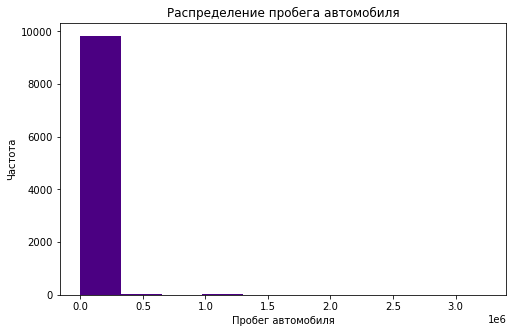

In [1129]:
plt.figure(figsize=(8 ,5))
plt.hist(df_c.odometer, color='indigo')
plt.xlabel('Пробег автомобиля')
plt.ylabel('Частота')
plt.title('Распределение пробега автомобиля')
plt.show();

«Ящик с усами»

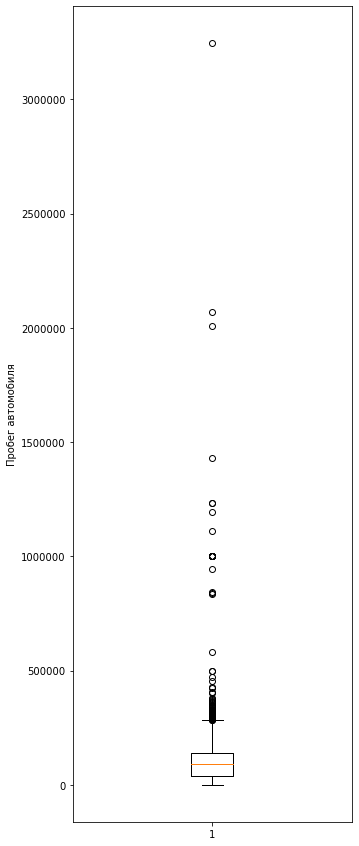

In [1130]:
ig, ax = plt.subplots(figsize=(5, 15))

ax.boxplot(df_c.odometer)
ax.set_ylabel('Пробег автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Из «ящика с усами» можно увидеть, что выбросы действительно существуют

Вывод статистики по этому признаку

In [1131]:
df_c.odometer.describe().apply(lambda x: f"{x:0.3f}")

count       9868.000
mean       96029.179
std        86790.099
min            0.000
25%        39252.500
50%        89116.000
75%       137198.250
max      3245000.000
Name: odometer, dtype: object

Написание функции, вычисляющую границы, в которые должны попадать нормальные значения. Нижняя граница рассчитывается как разница между нижним квартилем и интерквартильным размахом, помноженным на 1,5, а верхняя — как сумма интерквартильного размаха и верхнего квартиля, умноженного на 1,5

In [1132]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

Вывод границ с помощью функции


In [1133]:
boundaries = calculate_outliers(df_c.odometer)
boundaries

(-107666.125, 284116.875)

Нормальные значения выборки должны быть от -107444.375 до 283466.625. Если посмотреть на статистики, то видно, что верхняя граница меньше максимального значения, поэтому как минимум одно значение является выбросом

Запишем в переменную `is_outlier` информацию о том, какие значения меньше нижней границы или больше верхней

In [1134]:
is_outlier = (df_c.odometer < boundaries[0]) | (df_c.odometer > boundaries[1]) 
is_outlier

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Name: odometer, Length: 9868, dtype: boolean

Подсчет количества таких значений

In [1135]:
is_outlier.sum()

90

Вывод доли выборосов в выборке

In [1136]:
is_outlier.sum() / len(df_c)

0.009120389136603162

Доля выбросов меньше 1%. Вывод строк с предполагаемыми выбросами

In [1137]:
df_c[is_outlier]


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003,dodge,3500,diesel,307000,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
114,7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2...,show low,https://showlow.craigslist.org,2795,2004,mazda,tribute,gas,999999,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3...,ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. ...,az,34.117500,-109.919700,2021-04-22T10:52:07-0700,low,2021-04-22 17:52:07+00:00
385,7306101528,https://desmoines.craigslist.org/ctd/d/windom-...,des moines,https://desmoines.craigslist.org,59950,2013,other,CATERPILLAR CT660S,diesel,345256,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZ...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERP...,ia,43.863689,-95.113792,2021-04-13T08:34:24-0500,high,2021-04-13 13:34:24+00:00
444,7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces...,el paso,https://elpaso.craigslist.org,16999,2016,jeep,renegade,gas,999999,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6e...,"‘16 Jeep Renegade Limited, auto, air, power wi...",tx,32.288990,-106.781616,2021-04-09T09:26:05-0600,medium,2021-04-09 15:26:05+00:00
552,7314722320,https://nh.craigslist.org/ctd/d/medford-2015-h...,new hampshire,https://nh.craigslist.org,26500,2015,other,HINO 268A,diesel,429194,clean,automatic,https://images.craigslist.org/01111_aEpkHS4iop...,"2015 HINO 268A 24' REFRIG NCDL 260 HP, ALLISIO...",nh,42.417300,-71.108700,2021-04-30T07:30:45-0400,high,2021-04-30 11:30:45+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,7314148003,https://kansascity.craigslist.org/cto/d/lees-s...,"kansas city, MO",https://kansascity.craigslist.org,2999,2010,chevrolet,hhr ls,gas,344000,clean,automatic,https://images.craigslist.org/00n0n_h4YYCjZeD9...,2010 CHEVY HHR LS --- POWER LOCKS/WINDOWS/MIRR...,ks,38.851800,-94.394400,2021-04-28T20:15:49-0500,low,2021-04-29 01:15:49+00:00
9317,7313696556,https://mcallen.craigslist.org/cto/d/mcallen-2...,mcallen / edinburg,https://mcallen.craigslist.org,4500,2003,chevrolet,avalanche,gas,298968,clean,automatic,https://images.craigslist.org/00m0m_ey8pcui9d1...,Vendo mi Chevrolet Avalanche 2003 que está en ...,tx,26.215400,-98.235900,2021-04-27T23:10:38-0500,low,2021-04-28 04:10:38+00:00
9431,7306697432,https://knoxville.craigslist.org/cto/d/knoxvil...,knoxville,https://knoxville.craigslist.org,3550,2012,nissan,nv2500,gas,370000,clean,automatic,https://images.craigslist.org/00404_guoJBc6u6o...,Good running and driving van,tn,35.991800,-83.849600,2021-04-14T11:54:41-0400,low,2021-04-14 15:54:41+00:00
9542,7311709925,https://greatfalls.craigslist.org/cto/d/havre-...,great falls,https://greatfalls.craigslist.org,7000,2005,chevrolet,silverado,gas,290000,clean,automatic,https://images.craigslist.org/00808_hX52l6571o...,"2005 Chevy 1500 LS, has 290k miles on it but h...",mt,48.542862,-109.695310,2021-04-23T20:41:47-0600,low,2021-04-24 02:41:47+00:00


Выбросы только среди максимальных значений, поэтому можно заменить их верхним граничным значением

In [1138]:
df_c.loc[is_outlier, 'odometer'] = int(boundaries[1])

In [1139]:
df_c.odometer.describe()

count      9868.000000
mean      93653.186968
std       63278.154883
min           0.000000
25%       39252.500000
50%       89116.000000
75%      137198.250000
max      284116.000000
Name: odometer, dtype: float64

In [1140]:
calculate_outliers(df_c.odometer)

(-107666.125, 284116.875)

Гистограмма распределения пробега автомобиля

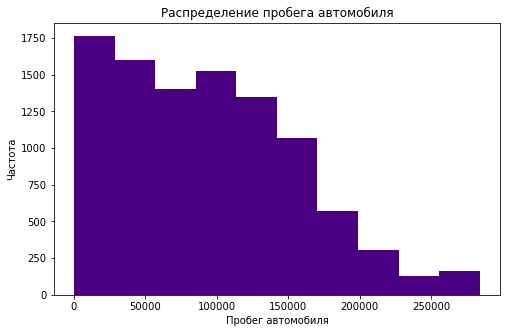

In [1141]:
plt.figure(figsize=(8 ,5))
plt.hist(df_c.odometer, color='indigo')
plt.xlabel('Пробег автомобиля')
plt.ylabel('Частота')
plt.title('Распределение пробега автомобиля')
plt.show();

«Ящик с усами»

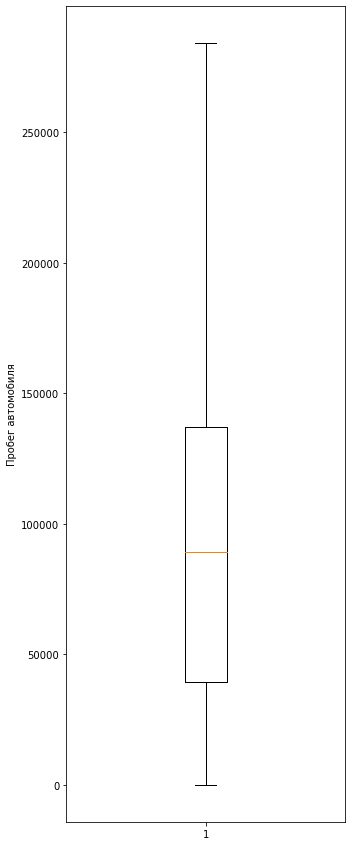

In [1142]:
ig, ax = plt.subplots(figsize=(5, 15))

ax.boxplot(df_c.odometer)
ax.set_ylabel('Пробег автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

##### Исследование `year`

Гистограмма распределения года производства автомобиля

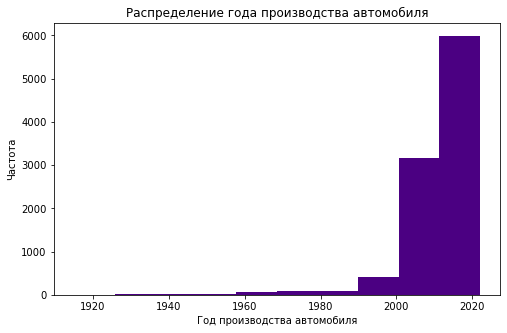

In [1143]:
plt.figure(figsize=(8 ,5))
plt.hist(df_c.year, color='indigo')
plt.xlabel('Год производства автомобиля')
plt.ylabel('Частота')
plt.title('Распределение года производства автомобиля')
plt.show();

«Ящик с усами»

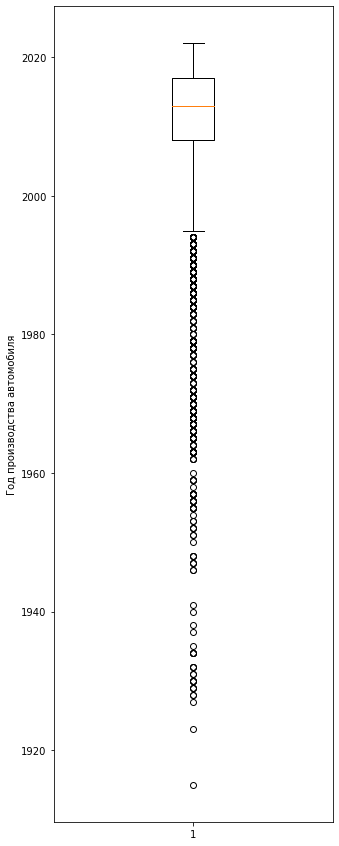

In [1144]:
ig, ax = plt.subplots(figsize=(5, 15))

ax.boxplot(df_c.year)
ax.set_ylabel('Год производства автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Из «ящика с усами» можно увидеть, что выбросы действительно существуют

In [1145]:
df_c.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

Вывод границ для нормальных значений года выпуска, используя интерквартильный размах

In [1146]:
boundaries = calculate_outliers(df_c.year)
boundaries

(1994.5, 2030.5)

Вывод количества выбросов в годе выпуска автомобиля

In [1147]:
is_outliers = (df_c.year < boundaries[0]) | (df_c.year > boundaries[1])
len(df_c[is_outliers])

394

Вывод доли выбросов в годе выпуска автомобиля

In [1148]:
len(df_c[is_outliers]) / len(df_c)

0.03992703688690717

In [1149]:
df_c[is_outliers]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04T20:22:11-0700,medium,2021-05-05 03:22:11+00:00
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25T10:10:43-0500,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29T10:49:29-0700,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20T18:30:18-0400,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29T15:11:01-0600,high,2021-04-29 21:11:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27T14:30:28-0500,low,2021-04-27 19:30:28+00:00
9969,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23T13:51:20-0700,medium,2021-04-23 20:51:20+00:00
9993,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27T19:44:27-0700,high,2021-04-28 02:44:27+00:00
10021,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03T14:58:34-0700,medium,2021-05-03 21:58:34+00:00


Вывод количества значений для категории цены для записей, в которых год выпуска автомобиля является выбросом

In [1150]:
df_c[is_outliers]['price_category'].value_counts()

low       181
medium    135
high       78
Name: price_category, dtype: int64

Так как выбросы в годе выпуска находятся среди минимальных значений, необходимо заполнить те значения, которые являются выбросами, значением нижней границы

In [1151]:
df_c.loc[is_outliers, 'year'] = int(boundaries[0])

In [1152]:
df_c.year.describe()

count    9868.000000
mean     2011.658391
std         6.530991
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

Гистограмма распределения года производства автомобиля

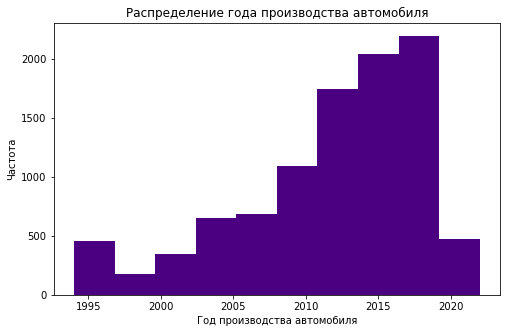

In [1153]:
plt.figure(figsize=(8 ,5))
plt.hist(df_c.year, color='indigo')
plt.xlabel('Год производства автомобиля')
plt.ylabel('Частота')
plt.title('Распределение года производства автомобиля')
plt.show();

«Ящик с усами»

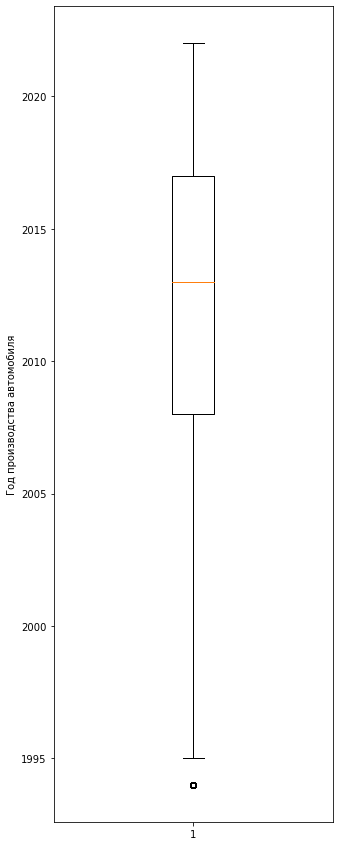

In [1154]:
ig, ax = plt.subplots(figsize=(5, 15))

ax.boxplot(df_c.year)
ax.set_ylabel('Год производства автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

##### Исследование `price`

Гистограмма распределения стоимости автомобиля

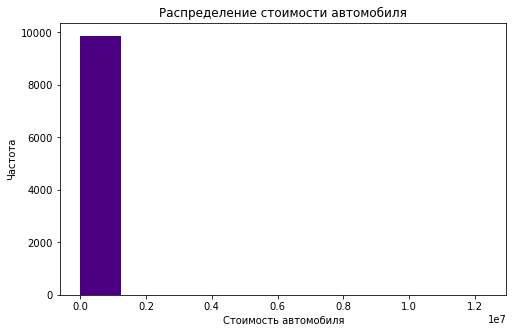

In [1155]:
plt.figure(figsize=(8 ,5))
plt.hist(df_c.price, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')
plt.show();

«Ящик с усами»

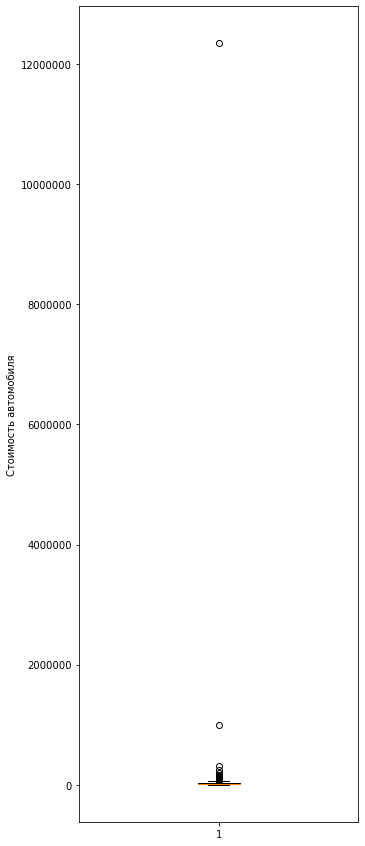

In [1156]:
ig, ax = plt.subplots(figsize=(5, 15))

ax.boxplot(df_c.price)
ax.set_ylabel('Стоимость автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Из «ящика с усами» можно увидеть, что выбросы действительно существуют

In [1157]:
df_c.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [1158]:
boundaries = calculate_outliers(df_c.price)
boundaries

(-22485.0, 58275.0)

Количество выбросов

In [1159]:
len(df_c[df_c.price > boundaries[1]])

207

Записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости

In [1160]:
df_c[df_c.price > boundaries[1]].sort_values(by="price")

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
946,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
6080,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00
4867,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00
8195,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
1271,7313450196,https://lasvegas.craigslist.org/ctd/d/salem-20...,las vegas,https://lasvegas.craigslist.org,58670,2016,chevrolet,other,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,nv,44.927304,-123.030322,2021-04-27T11:29:39-0700,high,2021-04-27 18:29:39+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
292,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
5682,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
9838,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,284116,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


Среди автомобилей с аномальной стоимостью действительно присуствуют автомобили, высокую стоимость которых можно объяснить, в первучю очередь, производителем и низким пробегом

In [1161]:
df_c = df_c[df_c.price <= boundaries[1]]
df_c.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


Гистограмма распределения стоимости автомобиля

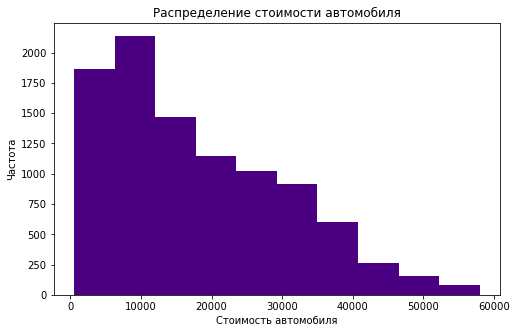

In [1162]:
plt.figure(figsize=(8 ,5))
plt.hist(df_c.price, color='indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')
plt.show();

«Ящик с усами»

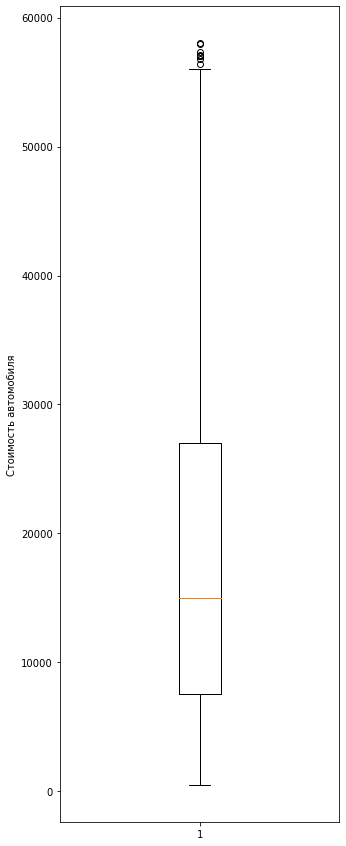

In [1163]:
ig, ax = plt.subplots(figsize=(5, 15))

ax.boxplot(df_c.price)
ax.set_ylabel('Стоимость автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

## Data Visualization

### Исследование зависимости стоимости автомобиля от года производства

Формирование новго датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год

In [1165]:
stats_year_price = df_c.groupby(['year'], as_index=False).agg({'price': 'mean'})
stats_year_price = stats_year_price.rename(columns={'price': 'price_mean'})
stats_year_price

,year,price_mean
0,1994,13528.049223
1,1995,9610.060606
2,1996,9362.960000
3,1997,6441.250000
4,1998,6528.672727
5,1999,7446.641975
6,2000,7614.410256
7,2001,7852.090164
8,2002,7173.798658
9,2003,7767.962162


Диаграмма рассеяния зависимости стоимости от года выпуска автомобиля

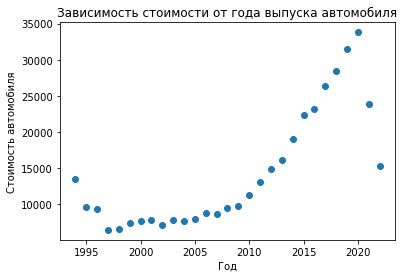

In [1168]:
plt.figure()
plt.scatter(stats_year_price.year, stats_year_price.price_mean)
plt.title('Зависимость стоимости от года выпуска автомобиля')
plt.xlabel('Год')
plt.ylabel('Стоимость автомобиля')
plt.show();

Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена. Исключение составляют наиболее старые и самые новые автомобили

Проверка: достаточно ли данных в выбивающихся из тренда значениях по годам. Вывод количества автомобилей, произведенных в каждый год

In [1169]:
stats_year_count = df_c.groupby(['year'], as_index=False)[['id']].count()
stats_year_count = stats_year_count.rename(columns={'id': 'count'})
stats_year_count

,year,count
0,1994,386
1,1995,33
2,1996,25
3,1997,44
4,1998,55
5,1999,81
6,2000,78
7,2001,122
8,2002,149
9,2003,185


За последние два года мало накопленной информации. Удаление их из исследования

In [1171]:
df_c = df_c[df_c.year < 2022]
df_c.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [1172]:
stats_year_price_new = df_c[df_c.year < 2022].groupby(['year'], as_index=False).agg({'price': 'mean'})
stats_year_price_new = stats_year_price_new.rename(columns={'price': 'price_mean'})
stats_year_price_new

,year,price_mean
0,1994,13528.049223
1,1995,9610.060606
2,1996,9362.960000
3,1997,6441.250000
4,1998,6528.672727
5,1999,7446.641975
6,2000,7614.410256
7,2001,7852.090164
8,2002,7173.798658
9,2003,7767.962162


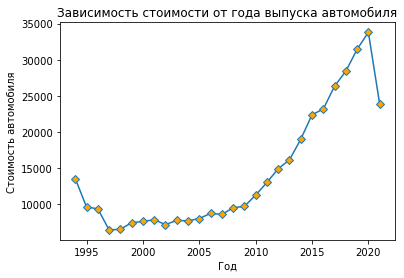

In [1173]:
plt.figure()
plt.plot(stats_year_price_new.year, stats_year_price_new.price_mean, marker='D', markerfacecolor='orange')
plt.xlabel('Год')
plt.ylabel('Стоимость автомобиля')
plt.title('Зависимость стоимости от года выпуска автомобиля')
plt.show();

Коэффициент корреляции Пирсона для стоимости автомобиля и года его производства.

In [1174]:
stats_year_price_new.year.corr(stats_year_price_new.price_mean)

0.8324772997336995

#### Вывод
Можно сделать вывод о существовании линейной связи между стоимостью автомобиля и годом его производства, так как коэффициент корреляции больше 0.7 и близок к 0.9, что говорит о линейной зависимости

Можно сделать вывод о сильной корреляции между стоимостью автомобиля и годом его производства, так как коэффициент корреляции больше значения 0.7

Существующая связь является прямой, так как коэффициент корреляции больше нуля.

### Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

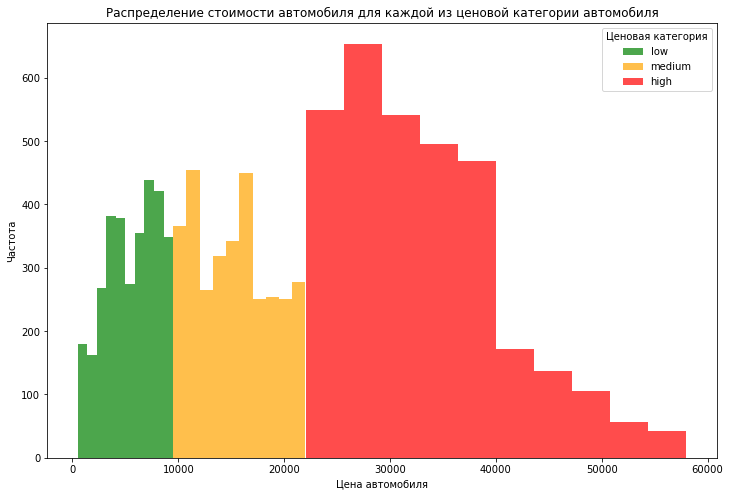

In [1175]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))

for price_category in colors:
    color = colors[price_category]
    data = df_c[df_c['price_category'] == price_category]
    
    ax.hist(data['price'], color=color, alpha=0.7)

plt.xlabel('Цена автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля для каждой из ценовой категории автомобиля')
plt.legend(colors, title='Ценовая категория')

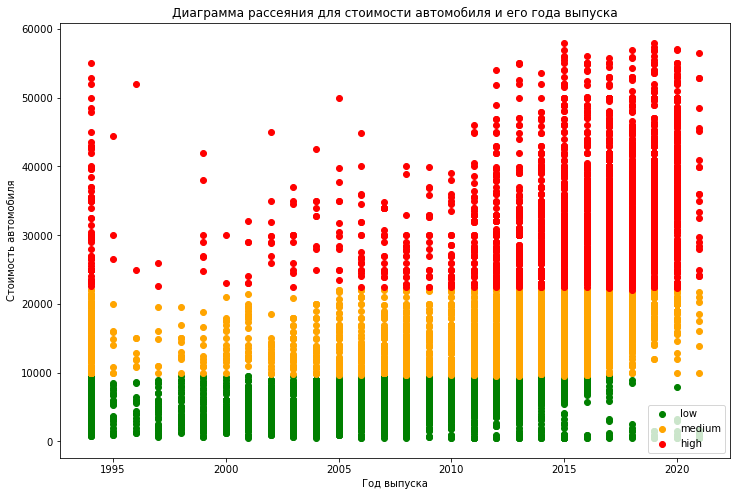

In [1176]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))

for price_category in colors:
    color = colors[price_category]
    data = df_c[df_c['price_category'] == price_category]
    
    ax.scatter(data['year'], data['price'], color=color)

plt.xlabel('Год выпуска')
plt.ylabel('Стоимость автомобиля')
plt.title('Диаграмма рассеяния для стоимости автомобиля и его года выпуска')
plt.legend(colors, loc='lower right')
plt.show()

### Визуализация категориальных переменных

Создание датафрейма, в котором содержится статистика о производителе автомобиля и количестве произведенных им автомобилей

In [1177]:
stats_manufacturer_count = df_c.groupby(['manufacturer'], as_index=False)[['id']].count()
stats_manufacturer_count = stats_manufacturer_count.rename(columns={'id': 'count'})
stats_manufacturer_count

,manufacturer,count
0,acura,149
1,alfa-romeo,13
2,audi,193
3,bmw,307
4,buick,145
5,cadillac,179
6,chevrolet,1243
7,chrysler,159
8,datsun,2
9,dodge,321


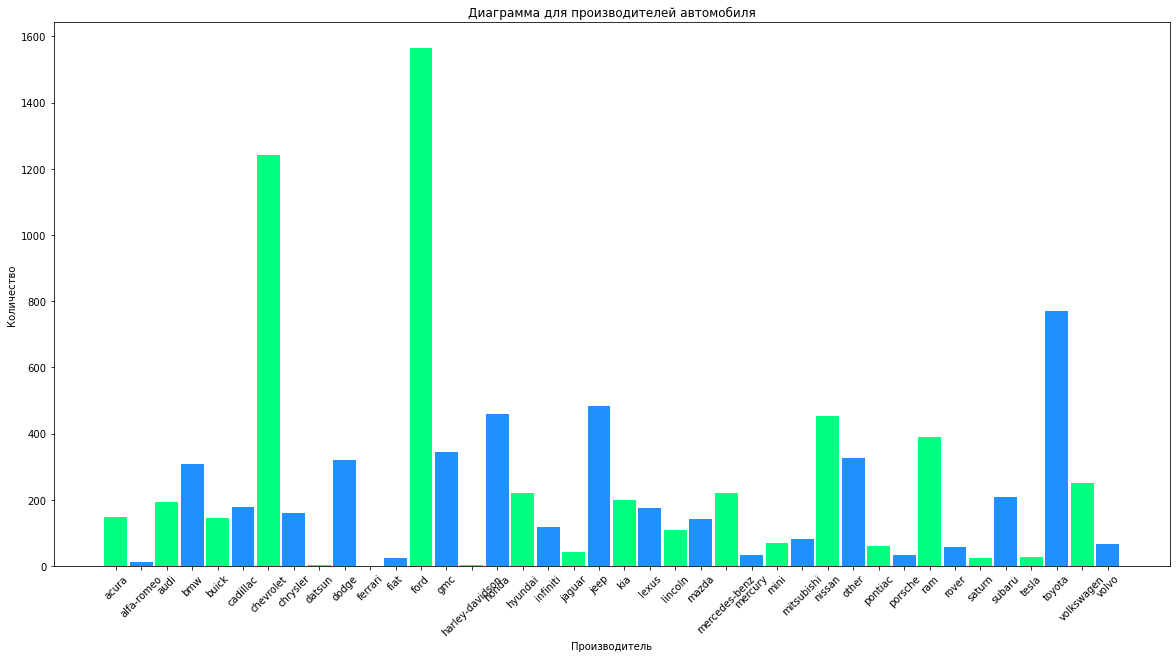

In [1178]:
plt.figure(figsize=(20, 10))
plt.bar(stats_manufacturer_count['manufacturer'], stats_manufacturer_count['count'], 
        color=['springgreen', 'dodgerblue'], width=0.9)

plt.xticks(rotation=45)

plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.title('Диаграмма для производителей автомобиля')
plt.show();

Создание датафрейма, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач 

In [1179]:
stats_transmission_count = df_c.groupby(['transmission'], as_index=False)[['id']].count()
stats_transmission_count = stats_transmission_count.rename(columns={'id': 'count'})
stats_transmission_count

,transmission,count
0,automatic,7398
1,manual,612
2,other,1649


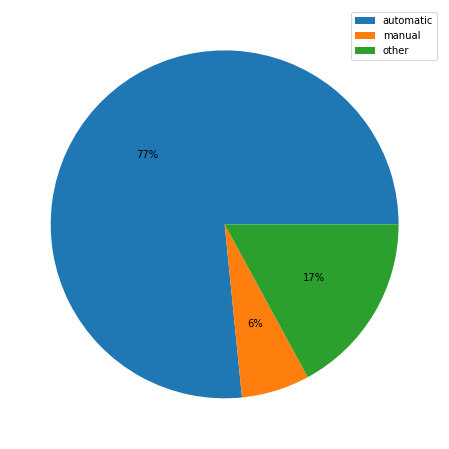

In [1180]:
plt.figure(figsize=(12, 8))
plt.pie(stats_transmission_count['count'], labels=stats_transmission_count['transmission'],
        labeldistance=None, autopct='%.0f%%')
plt.legend()
plt.show();

## Feature Engineering

In [1216]:
df_f = df_c.copy()

### Созадние нового признака `odometer/price`

In [1217]:
df_f['odometer/price'] = df_f.apply(lambda x: x.odometer / x.price, axis=1)
df_f['odometer/price']

0         0.499036
1         3.542852
2         0.394718
3         8.089034
4         0.366972
           ...    
10045    33.370412
10046     7.835323
10047    16.696387
10048     1.941787
10049     1.122882
Name: odometer/price, Length: 9659, dtype: float64

In [1218]:
df_f['odometer/price'].corr(df_f['price'])

-0.4903068971421812

### Создание нового признака: количество слов в описании автомобиля

In [1219]:
df_f.description

0        Carvana is the safer way to buy a car During t...
1        ***Call Us for more information at: 201-635-14...
2        Carvana is the safer way to buy a car During t...
3        2013 Toyota RAV4 XLE 4dr SUV     Offered by: R...
4        2021 Nissan Altima Sv with Only 8 K Miles Titl...
                               ...                        
10045    Transmission:Automatic Exterior Color:WHITE In...
10046    2008 Jeep Wrangler X  Offered by: R&L Auto -- ...
10047    2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...
10048    2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...
10049    Carvana is the safer way to buy a car During t...
Name: description, Length: 9659, dtype: object

In [1220]:
df_f['desc_len'] = df_f.apply(lambda x: len(x.description) , axis=1)
df_f['desc_len']

0        4482
1         968
2        4286
3        3241
4         538
         ... 
10045    1710
10046     948
10047     909
10048    3644
10049    4483
Name: desc_len, Length: 9659, dtype: int64

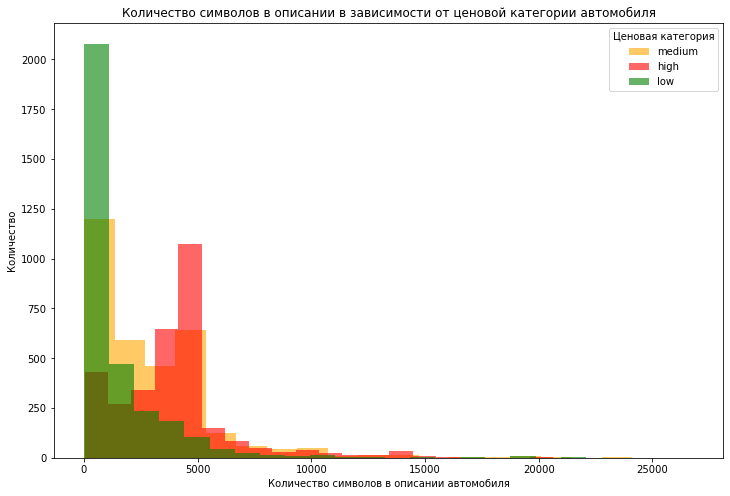

In [1221]:
colors = {'medium': 'orange', 'high': 'red', 'low': 'green',}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_f[df_f['price_category'] == price_category]

    ax.hist(data['desc_len'], color=color, alpha=0.6, bins=20)
    
plt.ylabel('Количество')
plt.xlabel('Количество символов в описании автомобиля')
plt.title('Количество символов в описании в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

### Как часто модель автомобиля встречается в описании автомобиля

In [1222]:
df_f['model_in_desc'] = df_f.apply(lambda x: x.description.count(x.model) , axis=1)
df_f['model_in_desc']

0        0
1        0
2        0
3        0
4        0
        ..
10045    0
10046    0
10047    0
10048    0
10049    0
Name: model_in_desc, Length: 9659, dtype: int64

In [1223]:
df_f['model_in_desc'].value_counts()

0     8539
1      792
2      101
3       50
5       31
4       23
9       14
8        9
7        9
6        9
28       9
16       8
18       6
15       5
20       5
14       5
17       4
25       3
31       3
23       3
27       3
11       3
22       3
13       3
19       3
29       2
10       2
35       2
26       1
63       1
54       1
36       1
34       1
49       1
30       1
56       1
32       1
12       1
Name: model_in_desc, dtype: int64

### Созадние нового признака `age_category`

- `old` — автомобиль старше 2013 года выпуска;
- `average`— автомобиль, выпущенный между 2006 и 2013 годом;
- `new` — автомобиль до 2006 года выпуска.

In [1224]:
df_f['age_category'] = df_f.year.apply(lambda x: 'old' if x < 2006 else ('new' if 2013 < x else 'average'))
df_f['age_category']

0            new
1            new
2            new
3        average
4            new
          ...   
10045        old
10046    average
10047    average
10048        new
10049        new
Name: age_category, Length: 9659, dtype: object

In [1225]:
df_f[['year', 'age_category']]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
4,2021,new
...,...,...
10045,2002,old
10046,2008,average
10047,2011,average
10048,2015,new


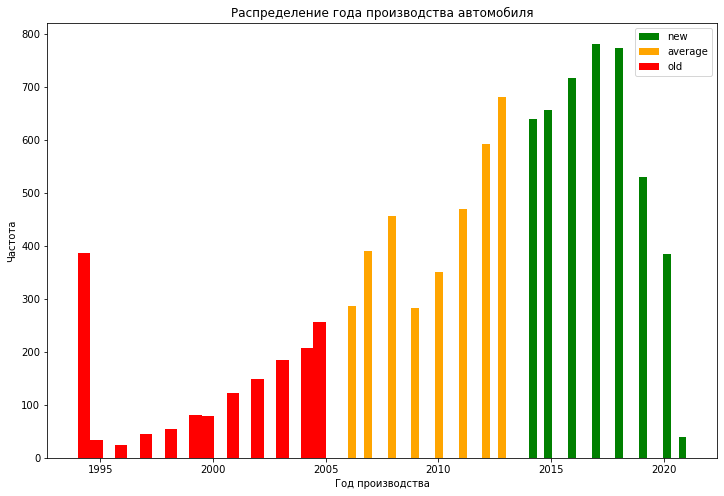

In [1226]:
colors = {'new': 'green', 'average': 'orange', 'old': 'r'}

fig, ax = plt.subplots(figsize=(12, 8))

for age_category in colors:
    color = colors[age_category]
    data = df_f[df_f['age_category'] == age_category]
    
    ax.hist(data['year'], bins=20, color=color)

plt.title('Распределение года производства автомобиля')
plt.xlabel('Год производства')
plt.ylabel('Частота')
plt.legend(colors);

### Созадние нового признака `model_len_std`
Длина наименования автомобиля

In [1227]:
df_f['model_len'] = df_f.model.apply(lambda x: len(x))
df_f['model_len']

0        22
1        20
2        16
3         4
4         6
         ..
10045     4
10046     8
10047    25
10048     7
10049    22
Name: model_len, Length: 9659, dtype: int64

In [1228]:
df_f.model_len.value_counts()

6      1008
5       902
7       726
8       682
4       648
       ... 
187       1
168       1
58        1
76        1
186       1
Name: model_len, Length: 65, dtype: int64

### Создание нового признака `model_word_count`
Количество слов в модели автомобиля

In [1229]:
df_f['model_word_count'] = df_f.model.apply(lambda x: len(x.split(' ')))
df_f['model_word_count']

0        5
1        4
2        3
3        1
4        1
        ..
10045    1
10046    1
10047    5
10048    1
10049    5
Name: model_word_count, Length: 9659, dtype: int64

### Создание нового признака `short_model`
Краткое название модели автомобиля

Количество уникальных значений для модели автомобиля

In [1230]:
df_f.model.nunique()

3357

Количество уникальных значений велико. Оставим только первое слово в наименовании модели

In [1231]:
df_f['short_model'] = df_f.model.apply(lambda x: x.split(' ')[0])
df_f['short_model']

0            2500
1        explorer
2            golf
3            rav4
4          altima
           ...   
10045        rav4
10046    wrangler
10047          a3
10048     cayenne
10049        1500
Name: short_model, Length: 9659, dtype: object

In [1232]:
df_f['short_model'].nunique()

948

### Создание нескольких признаков из категориальной переменной

In [1233]:
manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    # Ваш код здесь
    df_f[f'is_{manufacturer}'] = df_f.manufacturer.apply(lambda x: 1 if manufacturer in x else 0)
df_f.iloc[:, -7:]

,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
10045,0,0,0,1,0,0,0
10046,0,0,0,0,1,0,0
10047,1,0,0,0,0,0,0
10048,0,0,0,0,0,0,0


### Преобразование категориальных данных. One Hot Encoding

In [1234]:
name_list = ['fuel', 'short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
for name in name_list:
    print(f"{name}: {df_f[name].nunique()}")

fuel: 5
short_model: 948
transmission: 3
region: 393
manufacturer: 40
state: 51
title_status: 6
age_category: 3


In [1235]:
data = df_f[name_list]
data

,fuel,short_model,transmission,region,manufacturer,state,title_status,age_category
0,diesel,2500,other,chattanooga,ram,tn,clean,new
1,other,explorer,automatic,north jersey,ford,nj,clean,new
2,gas,golf,other,reno / tahoe,volkswagen,ca,clean,new
3,gas,rav4,automatic,fayetteville,toyota,nc,clean,average
4,gas,altima,automatic,new york city,nissan,ny,clean,new
...,...,...,...,...,...,...,...,...
10045,gas,rav4,automatic,chautauqua,toyota,ny,clean,old
10046,gas,wrangler,other,binghamton,jeep,ny,clean,average
10047,gas,a3,automatic,salem,audi,or,clean,average
10048,hybrid,cayenne,automatic,madison,porsche,wi,clean,new


In [1236]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
ohe_transform = ohe.transform(data)
df_f[ohe.get_feature_names()] = ohe_transform
df_f.head()

/Users/vladimir_lysov/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x5_wy,x6_clean,x6_lien,x6_missing,x6_parts only,x6_rebuilt,x6_salvage,x7_average,x7_new,x7_old
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Стандартизация данных. Standard Scaler

In [1237]:
name_list_2 = ['lat', 'long', 'year', 'odometer/price', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count']
data = df_f[name_list_2]

In [1241]:
std_scaler = StandardScaler()
std_scaler.fit(data)
std_scaled = std_scaler.transform(data)

In [1242]:
name_list_2_edit = ['lat_std', 'long_std', 'year_std', 'odometer/price_std', 'desc_len_std', 'model_in_desc_std',
                    'model_len_std', 'model_word_count_std']

In [1244]:
df_f[name_list_2_edit] = std_scaled
df_f.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,x7_new,x7_old,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.0,0.0,-0.618351,0.485473,1.297875,-0.508771,0.626840,-0.155666,1.164089,1.912620
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,1.0,0.0,0.388263,1.111660,0.683130,-0.401114,-0.646702,-0.155666,0.932887,1.237006
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,1.0,0.0,-0.842110,0.532386,0.836816,-0.512461,0.555806,-0.155666,0.470483,0.561392
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,-0.503753,0.854573,0.222072,-0.240321,0.177078,-0.155666,-0.916730,-0.789837
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,1.0,0.0,0.359086,1.136972,1.451561,-0.513442,-0.802542,-0.155666,-0.685528,-0.789837


### MinMax-нормализация данных

In [1246]:
data = df_f[['lat', 'long']]

In [1247]:
mms = MinMaxScaler()
mms.fit(data)
mms_transform = mms.transform(data)
df_f[['lat_mm', 'long_mm']] = mms_transform
df_f.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,lat_mm,long_mm
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-0.618351,0.485473,1.297875,-0.508771,0.626840,-0.155666,1.164089,1.912620,0.341769,0.288699
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.388263,1.111660,0.683130,-0.401114,-0.646702,-0.155666,0.932887,1.237006,0.468665,0.333055
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-0.842110,0.532386,0.836816,-0.512461,0.555806,-0.155666,0.470483,0.561392,0.313561,0.292022
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.503753,0.854573,0.222072,-0.240321,0.177078,-0.155666,-0.916730,-0.789837,0.356215,0.314844
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,0.359086,1.136972,1.451561,-0.513442,-0.802542,-0.155666,-0.685528,-0.789837,0.464987,0.334848


### Признаки на основе дат

In [1248]:
df_f.posting_date

0        2021-04-17T12:30:50-0400
1        2021-05-03T15:40:21-0400
2        2021-04-28T03:52:20-0700
3        2021-04-17T10:08:57-0400
4        2021-05-03T18:32:06-0400
                   ...           
10045    2021-04-10T16:33:57-0400
10046    2021-05-03T09:36:30-0400
10047    2021-04-22T12:14:01-0700
10048    2021-04-14T09:14:42-0500
10049    2021-04-24T13:50:49-0400
Name: posting_date, Length: 9659, dtype: object

In [1249]:
df_f.date

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-05-03 22:32:06+00:00
                   ...           
10045   2021-04-10 20:33:57+00:00
10046   2021-05-03 13:36:30+00:00
10047   2021-04-22 19:14:01+00:00
10048   2021-04-14 14:14:42+00:00
10049   2021-04-24 17:50:49+00:00
Name: date, Length: 9659, dtype: datetime64[ns, UTC]

In [1251]:
df_f.date = pd.to_datetime(df_f.date)
df_f.date

0       2021-04-17 16:30:50+00:00
1       2021-05-03 19:40:21+00:00
2       2021-04-28 10:52:20+00:00
3       2021-04-17 14:08:57+00:00
4       2021-05-03 22:32:06+00:00
                   ...           
10045   2021-04-10 20:33:57+00:00
10046   2021-05-03 13:36:30+00:00
10047   2021-04-22 19:14:01+00:00
10048   2021-04-14 14:14:42+00:00
10049   2021-04-24 17:50:49+00:00
Name: date, Length: 9659, dtype: datetime64[ns, UTC]

#### Создание признака `month`
Номер месяца размещения объявления о продаже автомобиля

In [1252]:
df_f['month'] = df_f.date.dt.month
df_f['month']

0        4
1        5
2        4
3        4
4        5
        ..
10045    4
10046    5
10047    4
10048    4
10049    4
Name: month, Length: 9659, dtype: int64

#### Создание признака `dayofweek`
День недели размещения объявления о продаже автомобиля

In [1253]:
df_f['dayofweek'] = df_f.date.dt.dayofweek
df_f['dayofweek']

0        5
1        0
2        2
3        5
4        0
        ..
10045    5
10046    0
10047    3
10048    2
10049    5
Name: dayofweek, Length: 9659, dtype: int64

#### Создание признака `diff_years`
Количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля

In [1254]:
df_f['diff_years'] = df_f.date.dt.year - df.year
df_f['diff_years']

0         1.0
1         5.0
2         4.0
3         8.0
4         0.0
         ... 
10045    19.0
10046    13.0
10047    10.0
10048     6.0
10049     4.0
Name: diff_years, Length: 9659, dtype: float64

#### Стандартизация данных. Standard Scaler

In [1255]:
df_f[['month', 'dayofweek', 'diff_years']]

,month,dayofweek,diff_years
0,4,5,1.0
1,5,0,5.0
2,4,2,4.0
3,4,5,8.0
4,5,0,0.0
...,...,...,...
10045,4,5,19.0
10046,5,0,13.0
10047,4,3,10.0
10048,4,2,6.0


In [1256]:
std_month = StandardScaler()
std_month.fit(df_f[['month', 'dayofweek', 'diff_years']])
std_month_transform = std_month.transform(df_f[['month', 'dayofweek', 'diff_years']])
df_f[['month_std', 'dayofweek_std', 'diff_years_std']] = std_month_transform
df_f.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,model_len_std,model_word_count_std,lat_mm,long_mm,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,1.164089,1.912620,0.341769,0.288699,4,5,1.0,-0.615686,1.120964,-0.950878
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,0.932887,1.237006,0.468665,0.333055,5,0,5.0,1.624205,-1.375437,-0.536848
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.470483,0.561392,0.313561,0.292022,4,2,4.0,-0.615686,-0.376877,-0.640355
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-0.916730,-0.789837,0.356215,0.314844,4,5,8.0,-0.615686,1.120964,-0.226325
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,...,-0.685528,-0.789837,0.464987,0.334848,5,0,0.0,1.624205,-1.375437,-1.054385


### Сохранение датафрейма для этапа моделирования

In [1258]:
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer/price', 'desc_len', 'model_in_desc', 
                    'age_category', 'model_len', 'model_word_count',
                    'short_model', 'lat_mm', 'long_mm', 'date',
                    'month', 'dayofweek', 'diff_years',
                    'odometer/price_std']
df_prepared = df_f.drop(columns=columns_for_drop)

In [1259]:
df_prepared.shape

(9659, 1469)

## Modeling

### DecisionTreeClassifier

In [1264]:
x = df_prepared.drop(columns=['price_category', 'price'])
y = df_prepared.price_category

In [1267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [1268]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [1269]:
predict_test = clf.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, predict_test)}')

accuracy: 0.6815044858523119


### Logistic Regression

In [1272]:
x = df_prepared.drop(columns=['price_category', 'price', 'id'])
y = df_prepared.price_category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

In [1273]:
logreg = LogisticRegression(random_state=42, C=3, max_iter=100)
logreg.fit(x_train, y_train)

/Users/vladimir_lysov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3, random_state=42)

Качество на тетстовой выборке

In [1274]:
logreg.score(x_train, y_train)

0.8569738204407632

Качество на тетстовой выборке

In [1276]:
logreg_pred = logreg.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, logreg_pred)}')

accuracy: 0.7398205659075224


Confusion matrix

In [1277]:
confusion_matrix(y_test, logreg_pred)

array([[780,  22, 172],
       [ 28, 744, 167],
       [141, 224, 620]])

### Multi-layer Perceptron classifier

In [1278]:
layers = (700, 400, 100, 20, 20, 5, 5, 5)
mlp = MLPClassifier(random_state=42, hidden_layer_sizes=layers, activation='relu', max_iter=700)
# Обучение модели
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(700, 400, 100, 20, 20, 5, 5, 5), max_iter=700,
              random_state=42)

In [1279]:
# Расчет метрик
mlp_pred = mlp.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, mlp_pred)}')
confusion_matrix(y_test, mlp_pred)

accuracy: 0.7501725327812284


array([[743,  13, 218],
       [ 17, 706, 216],
       [ 89, 171, 725]])

### Random forest classifier

In [1282]:
# Обучение модели
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [1283]:
# Расчет метрик
pred = rf_clf.predict(x_test)
print(f'accuracy: {accuracy_score(y_test, pred)}')
confusion_matrix(y_test, pred)

accuracy: 0.7529330572808833


array([[792,  29, 153],
       [ 19, 795, 125],
       [145, 245, 595]])

### Стратегия голосования

In [1284]:
pred_df = pd.DataFrame()
pred_df['LogReg'] = logreg_pred
pred_df['MLPClassifier'] = mlp_pred
pred_df['RandomForest'] = pred

In [1285]:
import random

# Формирование массива ответов
category_pice_list = ['low', 'medium', 'high']
target_list = []
for i in range(len(pred_df)):
    response = pred_df.loc[i, :].values.tolist()
    count_list = [response.count(category) for category in category_pice_list]
    
    if count_list.count(1) == 3:
        index_category = random.randint(0, 2) 
        
    else:
        max_count = max(count_list)
        index_category = count_list.index(max_count)
        
    target_list.append(category_pice_list[index_category])

In [1286]:
pred_df['target'] = target_list

In [1287]:
# Подсчет метрики
print(f'accuracy: {accuracy_score(y_test, pred)}')

accuracy: 0.7529330572808833


In [1288]:
confusion_matrix(y_test, pred_df.target)

array([[784,  21, 169],
       [ 19, 760, 160],
       [108, 203, 674]])